In [15]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import requests 
from io import BytesIO

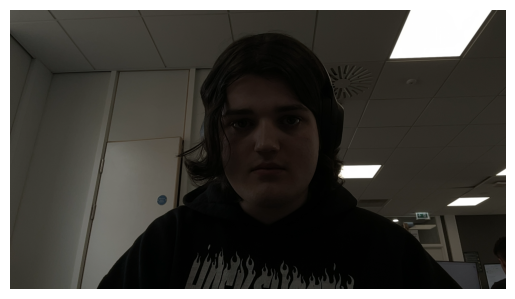

In [16]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("ERROR: Could not open webcam")
    exit() 

ret, frame = cap.read() 

if not ret: 
    print("ERROR: Could not capture frame")

cap.release() 
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
plt.axis('off')
plt.show()

In [17]:
# frame = cv2.imread('/Users/henrywilliams/Downloads/benrybilliams.jpg')
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [18]:
def adjust_gamma(image, gamma=1.0):

   invGamma = 1.0 / gamma
   table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

   return cv2.LUT(image, table)

In [19]:
def make_request(image):
    _, img_encoded = cv2.imencode('.jpg', image)
    url = 'http://localhost:8000/predict-gaze-location'
    files = {'file': img_encoded}
    data = {'method': 'desktop'}
    res = requests.post(url, files=files, data=data)
    return res

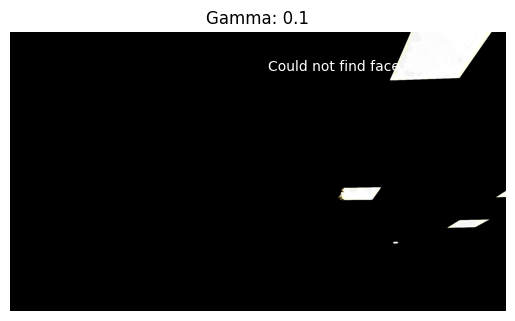

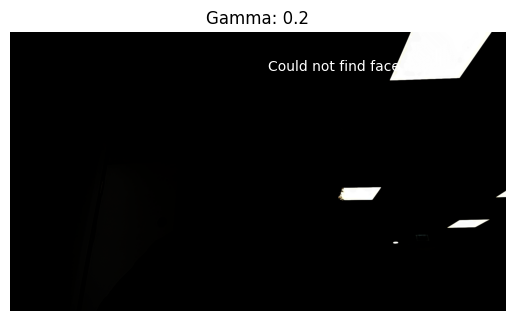

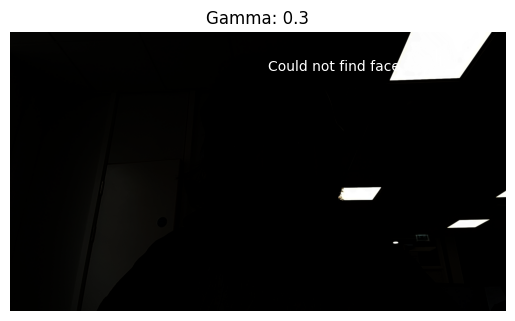

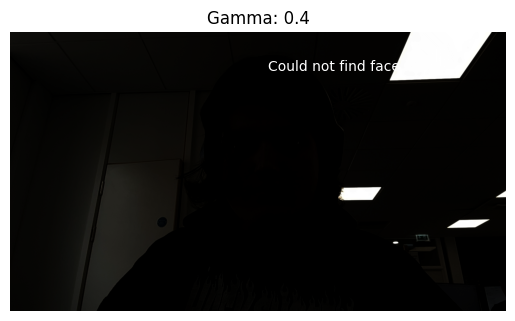

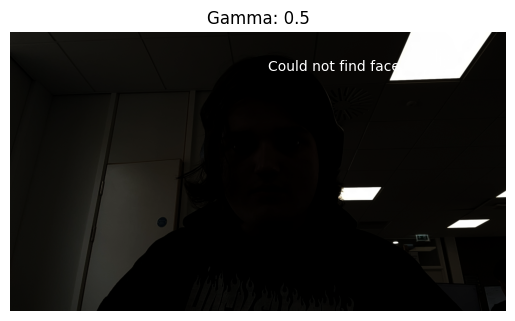

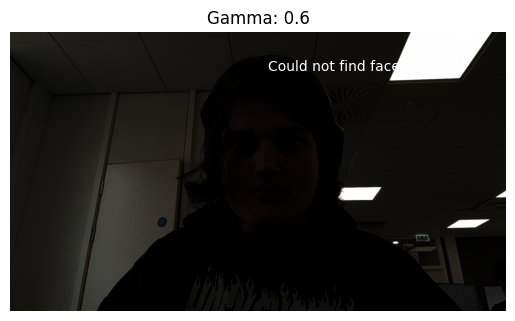

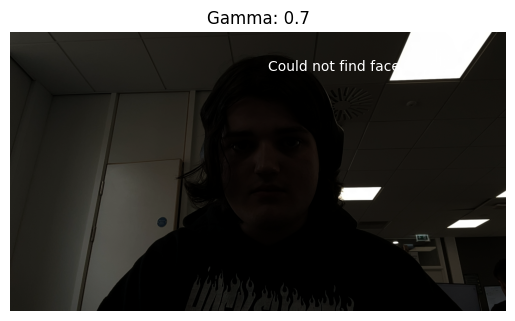

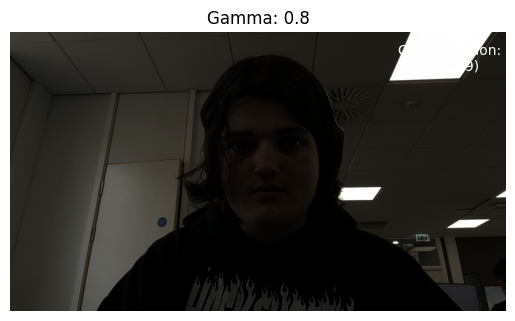

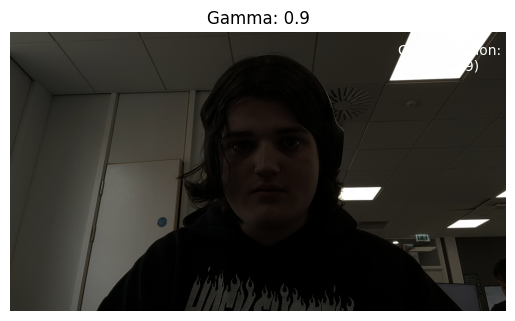

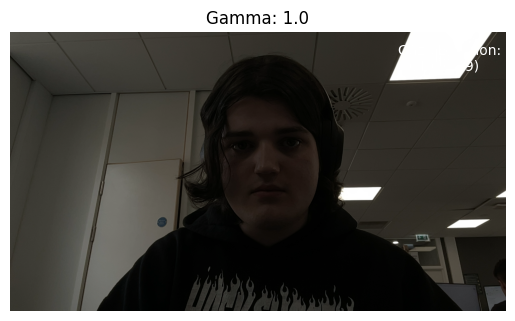

In [20]:
for i in range(1, 11):
    image = adjust_gamma(frame, i / 10)
    loc = make_request(image).json()

    plt.imshow(adjust_gamma(frame, i / 10))
    plt.axis("off")
    plt.title(f"Gamma: {i / 10}")
    if loc != {'error': 'face not found in image'}:
        plt.text(
            1500,
            150,
            f"Gaze Location:\n({loc['location']['x']:.2f}, {loc['location']['y']:.2f})",
            color="white"
        )
    else: 
        plt.text(1000, 150, "Could not find face in image", color="white")
    
    plt.show()